# A hands-on introduction to Natural Language Processing in Python
#### 16th July, 2019 at OSCON
## Pre-requisites

### Installing Jupyter on your machine

- If you already have Anaconda, you should have Jupyter installed as well. ```jupyter notebook``` opens up a Jupyter notebook in your browser at default port 8888. 

- Use pip install. ```python3 -m pip install jupyter``` for Python 3 install. For more details, refer to https://jupyter.org/install

- Also use pip to install the following packages: ```nltk, lxml, requests, matplotlib, sklearn, wikipedia, random, gensim, wordcloud```

In [ ]:
!pip install nltk

## NLTK
Natural Language Toolkit is the most popular collection of libraries and programs to do NLP. You can find more about it here: http://www.nltk.org/book/ch00.html. We will mainly be using NLTK to perform different tasks, along with a few other packages.

We will analyze sentences from Project Gutenberg electronic text archive. NLTK corpus includes a small selection of texts from this archive.

In [ ]:
import nltk
nltk.download('gutenberg')

In [1]:
from nltk.corpus import gutenberg

# Print first 100 characters of each file
for fileid in gutenberg.fileids()[0:10]:
    print(fileid)
    print(gutenberg.raw(fileid)[:100], '...')

austen-emma.txt
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a ...
austen-persuasion.txt
[Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire ...
austen-sense.txt
[Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The family of Dashwood had long been settle ...
bible-kjv.txt
[The King James Bible]

The Old Testament of the King James Bible

The First Book of Moses:  Called  ...
blake-poems.txt
[Poems by William Blake 1789]

 
SONGS OF INNOCENCE AND OF EXPERIENCE
and THE BOOK of THEL


 SONGS  ...
bryant-stories.txt
[Stories to Tell to Children by Sara Cone Bryant 1918] 


TWO LITTLE RIDDLES IN RHYME


     T ...
burgess-busterbrown.txt
[The Adventures of Buster Bear by Thornton W. Burgess 1920]

I

BUSTER BEAR GOES FISHING


Bu ...
carroll-alice.txt
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was ...
chesterton-ball.txt
[The Ba

In [2]:
# Use text from first file for analysis
sample_data = gutenberg.raw(gutenberg.fileids()[0])
sample_data

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister\'s marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse\'s family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice o

## Sentence segmentation
A paragraph is nothing but a collection of sentences. Also called sentence tokenization or sentence boundary disambiguation, this process breaks up sentences by deciding where a sentence starts and ends. Challenges include recognizing ambiguous puncutation marks. For example, `.` can be used for a decimal point, an ellipsis or a period. 

### Punkt Sentence Tokenizer

This tokenizer divides a text into a list of sentences
by using an unsupervised algorithm to build a model for abbreviation
words, collocations, and words that start sentences. 

In [ ]:
nltk.download('punkt')

In [3]:
from nltk.tokenize import sent_tokenize

def get_sentences(data, limit=10):
    """Sentence tokenization"""
    return sent_tokenize(data)[0:limit]

sample_sentences = get_sentences(sample_data)
for sentence in sample_sentences:
    print('\nsentence->', sentence)


sentence-> [Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

sentence-> She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.

sentence-> Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

sentence-> Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.

sentence-> Between _them_ it was more the intimacy
of sisters.

sentence-> Even before Miss Taylor

## Word tokenization
A sentence is a collection of words. Word tokenization is similar to sentence tokenization, but works on words. Let's use ```word_tokenize``` from ```nltk.tokenize``` to get the words. 

In [6]:
from nltk.tokenize import word_tokenize

def get_word_tokens(sentences):
    '''Word tokenization'''
    words = []
    for sent in sentences:
        words.extend(word_tokenize(sent))
    return(words)

sample_words = get_word_tokens(sample_sentences[0:5])

In [7]:
import matplotlib
from nltk.probability import FreqDist
matplotlib.use('TkAgg') 

def plot_freq_dist(words, num_words = 20):
    '''Frequency distribution'''
    fdist = FreqDist(words)
    fdist.plot(num_words, cumulative=False)

## Frequency distribution
Calculate the frequency distribution for each word in the data. Use ```nltk.probability``` from ```FreqDist``` and ```matplotlib```.

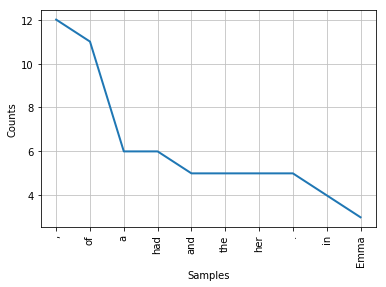

In [8]:
%matplotlib inline
plot_freq_dist(sample_words, num_words=10)

### Data Cleansing

Real world data is often messy and needs to undergo cleaning. You can do a bunch of preprocessing to ensure the data is clean, like:
- Removing special characters and numbers - These are usually not important when trying to derive the semantics
- Removing stopwords - A special category of words that don't have any significance on their own and are often used as filler words or to ensure correct grammer. Eg. the, and, but, of, is, or, those, her, 
- Removing HTML tags - Raw data from webpages can often be laden with HTML tags. Use a library like `BeautifulSoup` to process and remove the tags.
- Standardizing words - This aims to consolidate different versions of the same version Eg. SMS/Twitter language, slang, misspellings 
- Converting to lower case - To ensure uniformity across all words


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\config\classifier\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_clean_sentences(sentences, remove_digits=False):
    '''Cleaning sentences by removing special characters and optionally digits'''
    clean_sentences = []
    for sent in sentences:
        pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]' 
        clean_text = re.sub(pattern, '', sent)
        clean_text = clean_text.lower()
        clean_sentences.append(clean_text)
    print('Clean sentences:', clean_sentences)
    return clean_sentences

def filter_stopwords(words):
    '''Removing stopwords from given words'''
    filtered_words = [w for w in words if w not in stop_words]
    print('Filtered words:', filtered_words)
    return filtered_words

In [12]:
sample_sentences = get_clean_sentences(sample_sentences, remove_digits = True)
sample_words = get_word_tokens(sample_sentences)
sample_words = filter_stopwords(sample_words)

Clean sentences: ['emma by jane austen \n\nvolume i\n\nchapter i\n\n\nemma woodhouse handsome clever and rich with a comfortable home\nand happy disposition seemed to unite some of the best blessings\nof existence and had lived nearly twentyone years in the world\nwith very little to distress or vex her', 'she was the youngest of the two daughters of a most affectionate\nindulgent father and had in consequence of her sisters marriage\nbeen mistress of his house from a very early period', 'her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses and her place had been supplied\nby an excellent woman as governess who had fallen little short\nof a mother in affection', 'sixteen years had miss taylor been in mr woodhouses family\nless as a governess than a friend very fond of both daughters\nbut particularly of emma', 'between them it was more the intimacy\nof sisters', 'even before miss taylor had ceased to hold the nominal\noffice of governes

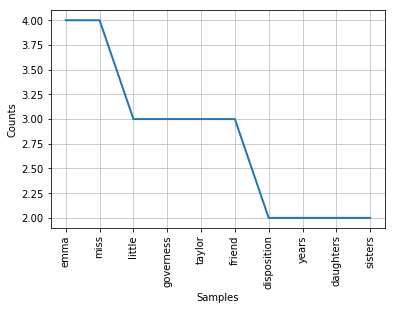

In [13]:
%matplotlib inline
plot_freq_dist(sample_words, num_words=10)

## POS tagging

The English language is formed of different parts of speech (POS) like nouns, verbs, pronouns, adjectives, etc. POS tagging analyzes the words in a sentences and associates it with a POS tag depending on the way it is used. Also called grammatical tagging or word-category disambiguation. Use ```nltk.pos_tag``` for the process. There are different types of tagsets used with the most common being the Penn Treebank tagset and the Universal tagset. 

![Penn POS tags](https://slideplayer.com/slide/6855236/23/images/11/Penn+TreeBank+POS+Tag+set.jpg)

In [14]:
nltk.download('averaged_perceptron_tagger')

def get_pos_tags(words):
    '''Get the part of speech (POS) tags for the words'''
    tags=[]
    for word in words:
        tags.append(nltk.pos_tag([word]))
    return tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\config\classifier\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
sample_tags = get_pos_tags(sample_words)
sample_tags

[[('emma', 'NN')],
 [('jane', 'NN')],
 [('austen', 'NNS')],
 [('volume', 'NN')],
 [('chapter', 'NN')],
 [('emma', 'NN')],
 [('woodhouse', 'NN')],
 [('handsome', 'NN')],
 [('clever', 'NN')],
 [('rich', 'JJ')],
 [('comfortable', 'JJ')],
 [('home', 'NN')],
 [('happy', 'JJ')],
 [('disposition', 'NN')],
 [('seemed', 'VBD')],
 [('unite', 'JJ')],
 [('best', 'JJS')],
 [('blessings', 'NNS')],
 [('existence', 'NN')],
 [('lived', 'VBD')],
 [('nearly', 'RB')],
 [('twentyone', 'NN')],
 [('years', 'NNS')],
 [('world', 'NN')],
 [('little', 'JJ')],
 [('distress', 'NN')],
 [('vex', 'NN')],
 [('youngest', 'JJS')],
 [('two', 'CD')],
 [('daughters', 'NNS')],
 [('affectionate', 'NN')],
 [('indulgent', 'NN')],
 [('father', 'NN')],
 [('consequence', 'NN')],
 [('sisters', 'NNS')],
 [('marriage', 'NN')],
 [('mistress', 'NN')],
 [('house', 'NN')],
 [('early', 'RB')],
 [('period', 'NN')],
 [('mother', 'NN')],
 [('died', 'VBD')],
 [('long', 'RB')],
 [('ago', 'RB')],
 [('indistinct', 'NN')],
 [('remembrance', 'NN'

## Text processing
Text processing approaches like stemming and lemmatization help in reducing inflectional forms of words. 

### Stemming
Stemming tries to cut off at the ends of the words in the hope of deriving the base form. Stems aren't always real words. Use ```PorterStemmer``` from ```ntlk.stem```.

In [16]:
from nltk.stem import PorterStemmer

def get_stems(words):
    '''Reduce the words to their base word (stem) by cutting off the ends'''
    ps = PorterStemmer()
    stems = []
    for word in words:
        stems.append(ps.stem(word))
    return stems

sample_stems = get_stems(['Latest', 'Trending', 'Headlines'])
print(sample_stems)
sample_stems = get_stems(['Latest', 'Trends'])
print(sample_stems)

['latest', 'trend', 'headlin']
['latest', 'trend']


### Lemmatization
Lemmatization groups different inflected forms of a words so they can be mapped to the same base. Lemmas are real words. More complex than stemming, context of words is also analyzed. Uses WordNet which is a lexical English database. 
Use ```WordNetLemmatizer``` from ```nltk.stem``` and provide it the POS tag along with the word. 

In [17]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_lemma(word_tags):
    '''Reduce the words to their base word (lemma) by using a lexicon'''
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for element in word_tags:
        word = element[0][0]
        pos = element[0][1]
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, # Mapping NLTK POS tags to WordNet POS tags
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        wordnet_pos = tag_dict.get(tag, wordnet.NOUN)
        lemma.append(wordnet_lemmatizer.lemmatize(word, wordnet_pos))
    return(lemma)

sample_lemma = get_lemma(get_pos_tags(['Latest', 'Trending', 'Headlines']))
sample_lemma

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\config\classifier\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Latest', 'Trending', 'Headlines']

## Feature Generation from text

The process of converting NLP text into numbers is called <b>vectorization</b>. These numbers are features that act as inputs to predictive models. It also helps in using lesser memory by making the data smaller and reducing the size of the vocabulary. Often times, these normalized words are sufficient to provide the semantics. Like in the case of understanding the meaning behind the sentences:

### Bag of words
Bag of words is an approach for text feature extraction. Just imagine a bag of popcorn, 
and each popcorn kernel represents a word that is present in the text. Each sentence can be represented as a vector
of all the words present in a vocabulary. If a word is present in the sentence, it is 1, otherwise 0.

![Bag of words](https://cdn-images-1.medium.com/max/1600/1*zMdHVQQ7HYv_mMZ5Ne-2yQ.png)

### TF-IDF
Term-frequency inverse document frequency assigns scores to words inside a document. Commonly occuring words in all documents would have less weightage.
![TF IDF](http://www.bloter.net/wp-content/uploads/2016/09/td-idf-graphic.png)

In [18]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

def get_bag_of_words(sentences):
    ''''''
    vectorizer = CountVectorizer()
    print(vectorizer.fit_transform(sentences).todense())
    print(vectorizer.vocabulary_) 
    
get_bag_of_words(['my car is lemon', 'lemon is yellow', 'drink lemon'])

[[1 0 1 1 1 0]
 [0 0 1 1 0 1]
 [0 1 0 1 0 0]]
{'my': 4, 'car': 0, 'is': 2, 'lemon': 3, 'yellow': 5, 'drink': 1}


In [19]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

def get_bag_of_words(sentences):
    ''''''
    vectorizer = TfidfVectorizer()
    print(vectorizer.fit_transform(sentences).todense())
    print(vectorizer.vocabulary_) 
    
get_bag_of_words(['my car is lemon', 'lemon is yellow', 'drink lemon'])

[[0.5844829  0.         0.44451431 0.34520502 0.5844829  0.        ]
 [0.         0.         0.54783215 0.42544054 0.         0.72033345]
 [0.         0.861037   0.         0.50854232 0.         0.        ]]
{'my': 4, 'car': 0, 'is': 2, 'lemon': 3, 'yellow': 5, 'drink': 1}
